In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import lux 

In [7]:
def RUL_extractor(data):
    """
     extract the RUL value from the data 
    """
    df = data.copy()
    fd_RUL = df.groupby('engine_id')['cycle'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['engine_id','max']
    df = df.merge(fd_RUL, on=['engine_id'], how='left')
    df['RUL'] = df['max'] - df['cycle']
    df.drop(columns=['max'],inplace = True)
    
    return df[df['cycle'] > 0]

In [8]:
def explore(path, pairwise=False):
    """
     explore the values in each dataset and print heatmap and pairplot 
    """ 
    
    if path.endswith(".txt"):
        
        df = pd.read_table(path, header=None, delim_whitespace=True)
        column_name = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
               's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
               's15', 's16', 's17', 's18', 's19', 's20', 's21']
        df.columns = column_name
        df = RUL_extractor(df)
        df.drop(["engine_id","cycle"], axis=1, inplace=True)
    elif path.endswith(".csv"):
        df = pd.read_csv(path)
    print(df.nunique())
    print("Null values: \n")
    print(df.isnull().sum())
    
    
    corr = df.corr()
    sns.heatmap(corr,cmap='RdYlGn',annot=True)
    fig=plt.gcf()
    fig.set_size_inches(20,20)
    plt.show()
    if pairwise:
        
        sns.pairplot(df, corner=True)
    return df

In [9]:
path1 = '../data/raw/CMAPSSData/train_FD001.txt'
path2 = '../data/raw/CMAPSSData/train_FD002.txt'
path3 = '../data/raw/CMAPSSData/train_FD003.txt'
path4 = '../data/raw/CMAPSSData/train_FD004.txt'
path5 = '../data/processed/normalized_train_data.csv'


C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\lux\vis\VisList.py:305: UserWarning:
The following issues are ecountered when validating the parsed intent:
- The input attribute '0' does not exist in the DataFrame. 
  Please check your input intent for typos.
C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\ipykernel_launcher.py:13: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 
C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\ipykernel_launcher.py:15: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 


setting1     158
setting2      13
setting3       1
s1             1
s2           310
s3          3012
s4          4051
s5             1
s6             2
s7           513
s8            53
s9          6403
s10            1
s11          159
s12          427
s13           56
s14         6078
s15         1918
s16            1
s17           13
s18            1
s19            1
s20          120
s21         4745
RUL          362
dtype: int64

Null values: 

setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
RUL         0
dtype: int64



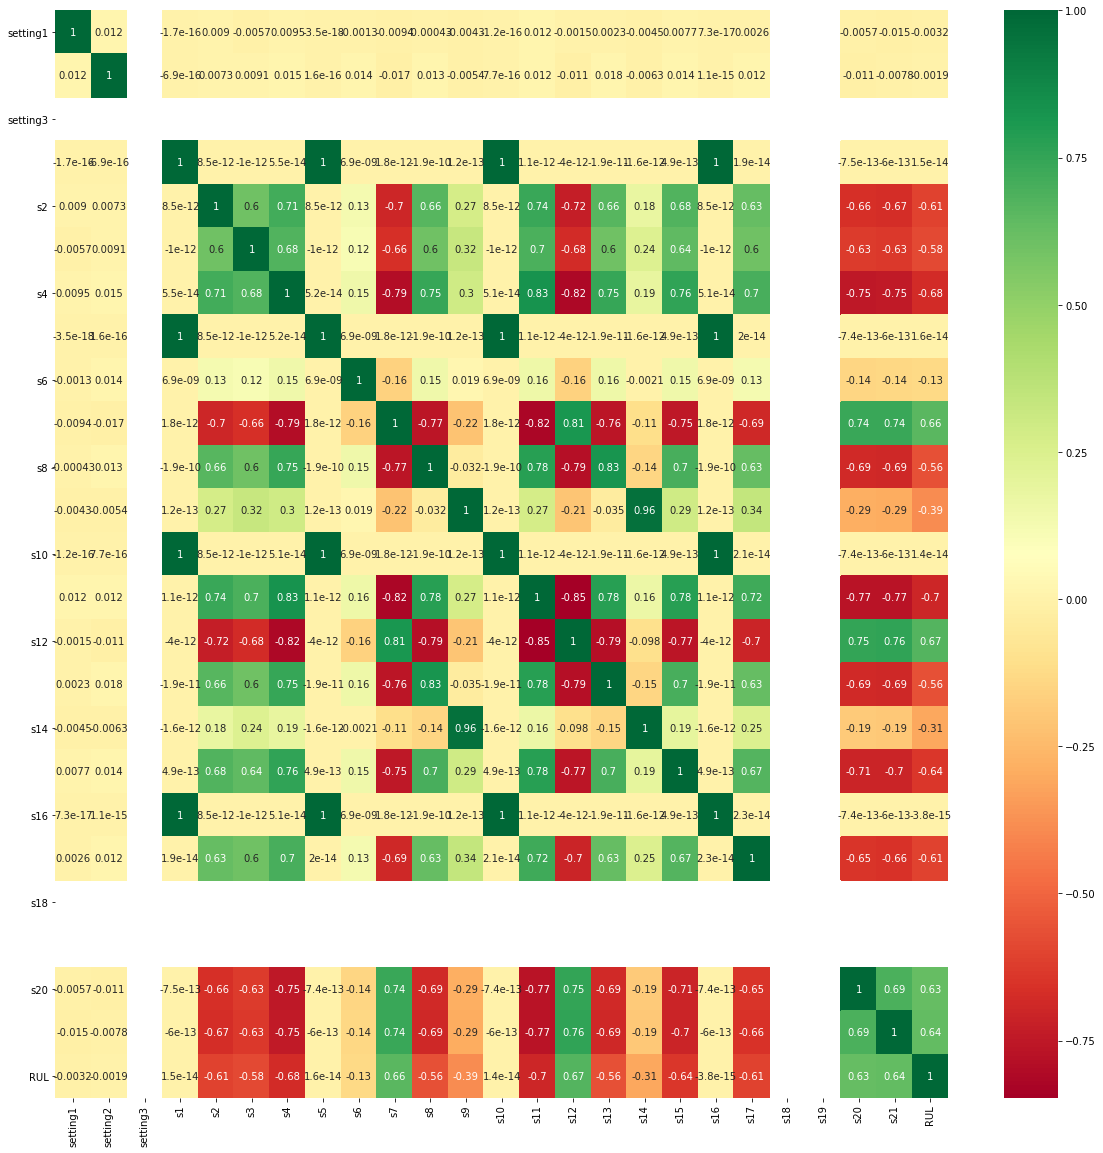

In [10]:
df1 = explore(path1)

In [11]:
df = pd.read_table(path1, header=None, delim_whitespace=True)
column_name = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21']
df.columns = column_name

In [12]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
df

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [14]:

df1

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='s9'>

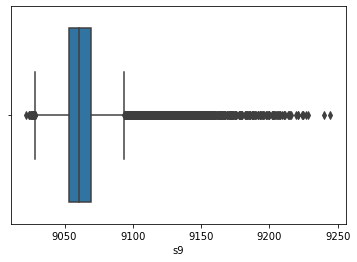

In [15]:
sns.boxplot(df1['s9'])

C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\lux\vis\VisList.py:305: UserWarning:
The following issues are ecountered when validating the parsed intent:
- The input attribute '0' does not exist in the DataFrame. 
  Please check your input intent for typos.
C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\ipykernel_launcher.py:13: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 
C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\ipykernel_launcher.py:15: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 


setting1      536
setting2      105
setting3        2
s1              6
s2           1590
s3          12305
s4          15411
s5              6
s6             14
s7           2067
s8            897
s9          22434
s10             9
s11           681
s12          1672
s13           514
s14         14905
s15          8464
s16             2
s17            53
s18             6
s19             2
s20           510
s21         17837
RUL           378
dtype: int64

Null values: 

setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
RUL         0
dtype: int64



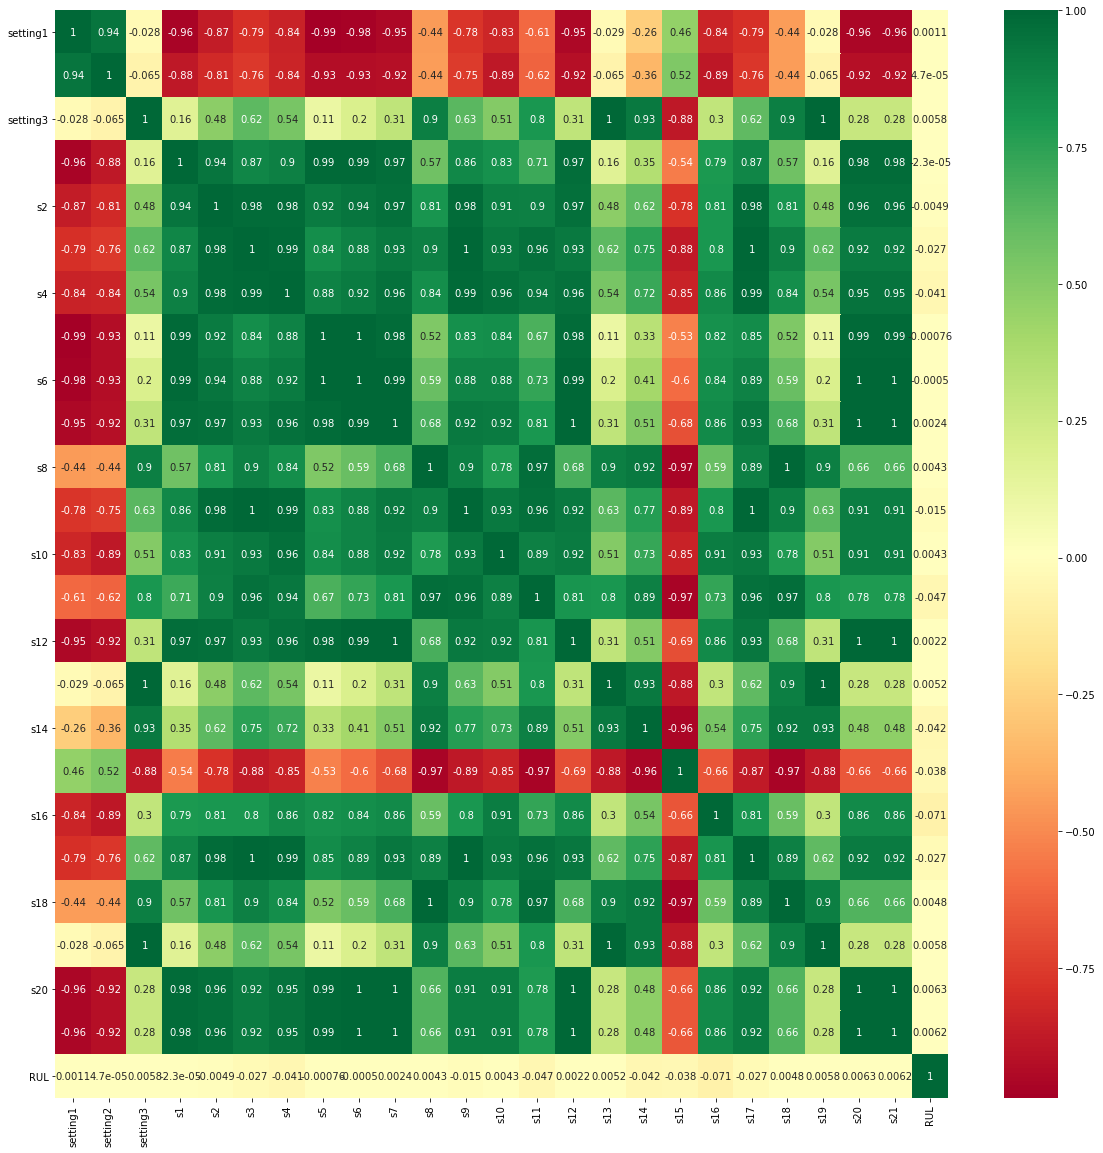

In [16]:
df2 = explore(path2)

In [17]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\lux\vis\VisList.py:305: UserWarning:
The following issues are ecountered when validating the parsed intent:
- The input attribute '0' does not exist in the DataFrame. 
  Please check your input intent for typos.
C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\ipykernel_launcher.py:13: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 
C:\Users\serop\Anaconda3\envs\rul-estimation-with-bayesian-nns\lib\site-packages\ipykernel_launcher.py:15: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 


setting1     160
setting2      14
setting3       1
s1             1
s2           334
s3          3358
s4          4383
s5             1
s6            17
s7          1854
s8           161
s9          7114
s10            4
s11          170
s12         1772
s13          163
s14         6320
s15         3122
s16            1
s17           12
s18            1
s19            1
s20          165
s21         6440
RUL          525
dtype: int64

Null values: 

setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
RUL         0
dtype: int64



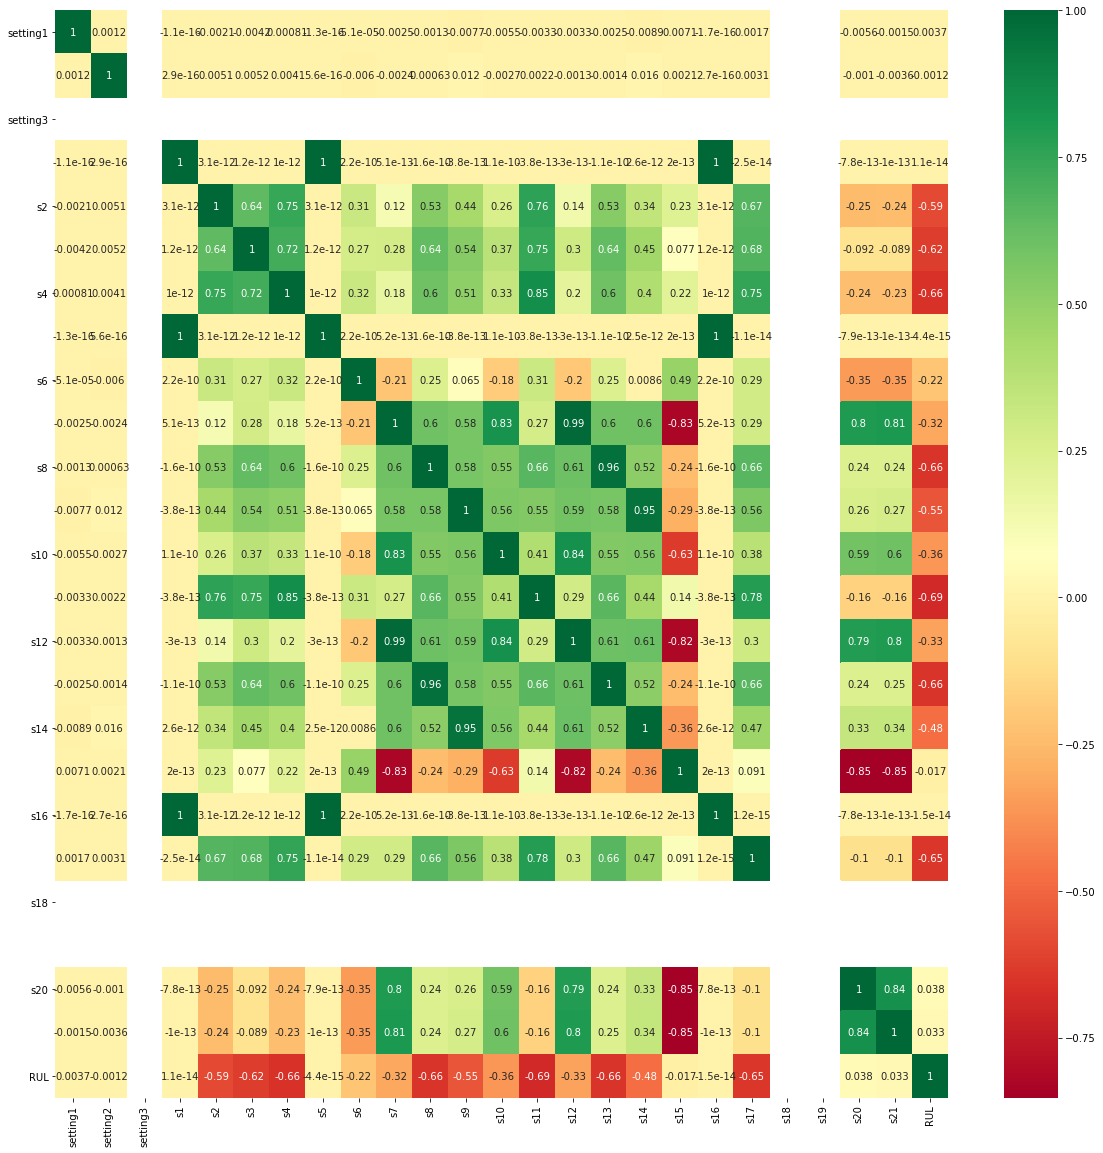

In [18]:
df3 = explore(path3)

In [19]:
df3

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df4 = explore(path4)

In [ ]:
df4

In [ ]:
df5 = explore(path5)

In [ ]:
df5